In [1]:
"""
This notebook compares the performance of CLIPNET against Puffin.
We use averaged profiles across all 67 libraries as ground truth.
"""

'\nThis notebook compares the performance of CLIPNET against Puffin.\nWe use averaged profiles across all 67 libraries as ground truth.\n'

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [1]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "evaluation_metric.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR}")

TAR = "puffin_benchmark.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR} -C {SCRATCH}")

wget https://zenodo.org/records/10597358/files/evaluation_metric.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/evaluation_metric.tar.gz
wget https://zenodo.org/records/10597358/files/puffin_benchmark.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/puffin_benchmark.tar.gz -C /Users/adamhe/github/scratch


In [6]:
# LOAD DATA

# Negative and positive bounds for model performance on correlation
mean_predictor_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_metric/pos_neg_bounds/mean_predictor_corrs.csv.gz"),
    index_col=0,
)
replicate_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_metric/pos_neg_bounds/replicate_pearsons.csv.gz"),
    index_col=0,
)

# Load model predictions
clipnet = h5py.File(
    os.path.join(
        SCRATCH,
        "puffin_benchmark/fixed_uniq_windows_clipnet_test_perf.h5",
    )
)["track_pearson"][:]
puffin = pd.read_csv(
    os.path.join(SCRATCH, "puffin_benchmark/puffin_clipnet_test_perf.csv.gz"), header=None
)

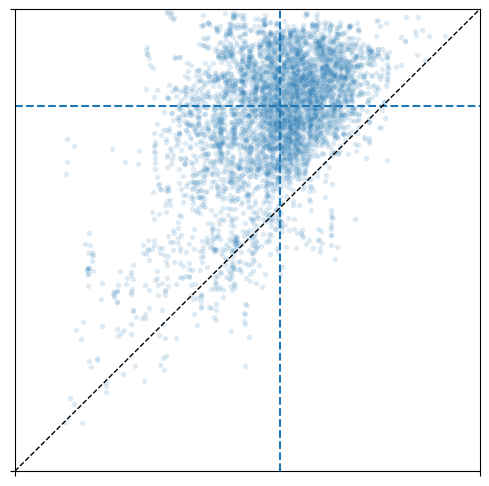

In [17]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="scatter_density")
#density = ax.scatter_density(y=clipnet, x=puffin.values.flatten(), cmap=white_viridis)
density = sns.scatterplot(y=clipnet, x=puffin.values.flatten(), ax=ax, alpha=0.15, s=15, )
#fig.colorbar(density)
plt.axhline(np.nanmedian(clipnet), 0, 1, color=colors[0], linestyle="--")
plt.axvline(np.nanmedian(puffin), 0, 1, color=colors[0], linestyle="--")
# Add diagonal line
ax.plot([0, 1], [0, 1], color="black", linestyle="--", linewidth=1)
ax.set_xlim(-0, 1)
ax.set_ylim(-0, 1)
ax.set_yticks([-0, 1])
ax.set_yticklabels(["", ""])
ax.set_xticks([-0, 1])
ax.set_xticklabels(["", ""])
plt.savefig("img/puffin_comparison_pearson_scatterplot.pdf")

/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adamhe/miniforge3/envs/plt/lib/python3.12/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

0.21288294055949813 0.7901019255482333 0.5698701245952852 0.9240692449850152


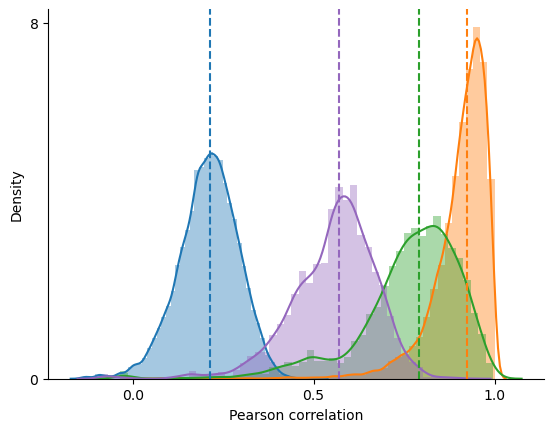

In [7]:
# Plot pdf of predicted vs observed pearson correlations

fig, d = plt.subplots()
sns.distplot(mean_predictor_corr.mean(axis=0))
sns.distplot(replicate_corr.values.reshape(-1))
sns.distplot(clipnet.reshape(-1))
sns.distplot(puffin.values.reshape(-1), color=colors[4])
plt.axvline(np.nanmedian(mean_predictor_corr), 0, 1, color=colors[0], linestyle="--")
plt.axvline(np.nanmedian(replicate_corr), 0, 1, color=colors[1], linestyle="--")
plt.axvline(np.nanmedian(clipnet), 0, 1, color=colors[2], linestyle="--")
plt.axvline(np.nanmedian(puffin), 0, 1, color=colors[4], linestyle="--")
d.set_yticks([0, 8])
#d.set_yticklabels(["", ""])
d.set_xticks([0, 0.5, 1])
#d.set_xticklabels(["", "", ""])
d.set_ylabel("Density")
d.set_xlabel("Pearson correlation")
sns.despine()
plt.savefig("img/puffin_comparison_pearson.pdf")

print(
    np.nanmedian(mean_predictor_corr),
    np.nanmedian(clipnet),
    np.nanmedian(puffin),
    np.nanmedian(replicate_corr)
)

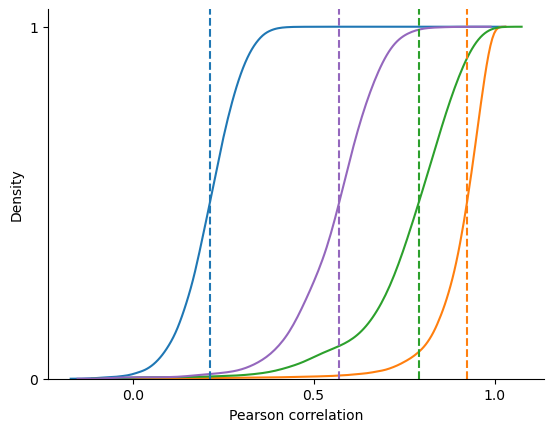

In [66]:
# Plot cdfs of pearson correlations (not used in paper, but here for completion's sake)

fig, d = plt.subplots()
sns.kdeplot(list(mean_predictor_corr.mean(axis=0)) + [1], cumulative=True)
sns.kdeplot(replicate_corr.values.reshape(-1), cumulative=True)
sns.kdeplot(clipnet.reshape(-1), cumulative=True)
sns.kdeplot(puffin.values.reshape(-1), color=colors[4], cumulative=True)
plt.axvline(np.nanmedian(mean_predictor_corr), 0, 1, color=colors[0], linestyle="--")
plt.axvline(np.nanmedian(replicate_corr), 0, 1, color=colors[1], linestyle="--")
plt.axvline(np.nanmedian(clipnet), 0, 1, color=colors[2], linestyle="--")
plt.axvline(np.nanmedian(puffin), 0, 1, color=colors[4], linestyle="--")
d.set_yticks([0, 1])
#d.set_yticklabels(["", ""])
d.set_xticks([0, 0.5, 1])
#d.set_xticklabels(["", "", ""])
d.set_ylabel("Density")
d.set_xlabel("Pearson correlation")
sns.despine()
plt.savefig("img/puffin_comparison_pearson_cdf.pdf")